### Imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

c_blue1='#5c509d'
c_green1='#7dc0a7'
c_green2='#39d05c'
c_violet1='#301466'
c_gray1='#444444'
c_orange1= '#ECA72C'

data_dir = '../data/csv_files_for_plots'

### Questions plot

In [5]:
# df_questions = pd.read_csv(f'{data_dir}/accuracy-question/all.csv')
df_questions = pd.read_csv(f'../../csv_files_for_plots/accuracy-question/all_checkers_final_results-gpt35t.csv')
# df_questions = pd.read_csv(f'../../csv_files_for_plots/accuracy-question/all_checkers_final_results-llama3.csv')
df_questions.head(10)

,Unnamed: 0,type,full_question,label,final_accuracy,final_ci_lb,final_ci_ub
0,0,state,How many times did player X choose p?,#actions,0.997525,0.992673,1.002376
1,1,state,What is player X's current total payoff?,#points,0.995050,0.985347,1.004752
2,2,rules,What is the lowest/highest payoff player A can...,min_max,1.000000,1.000000,1.000000
3,3,rules,Which actions is player A allowed to play?,actions,1.000000,1.000000,1.000000
4,4,rules,Which is player X's payoff in a single round i...,payoff,0.959158,0.945503,0.972814
5,5,time,Which is the current round of the game?,round,1.000000,1.000000,1.000000
6,6,time,Which action did player X play in round i?,action_i,0.934259,0.919472,0.949047
7,7,time,How many points did player X collect in round i?,points_i,0.825926,0.803302,0.848550


C:\Users\fonta\AppData\Local\Temp\ipykernel_19640\3853015975.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels,rotation=90, fontsize=18)


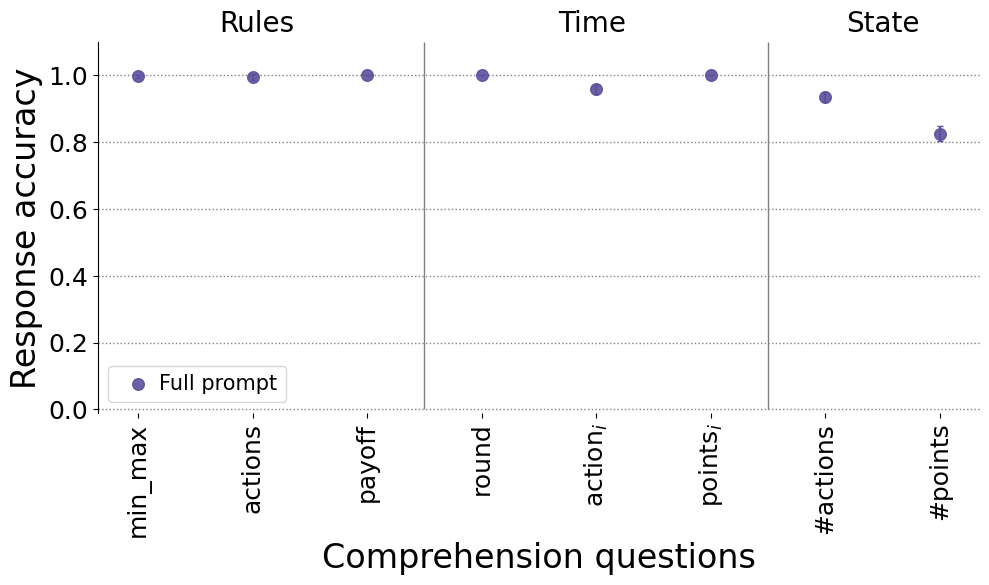

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.scatter(df_questions['label'], df_questions['final_accuracy'], marker='o', 
           s=70, zorder=10, alpha=0.9, c=c_blue1,
           label='Full prompt')
ax.errorbar(df_questions['label'], df_questions['final_accuracy'], yerr=(df_questions['final_ci_ub']-df_questions['final_ci_lb'])/2, 
            capsize=2, fmt='none', c=c_blue1)

# ax.scatter(df_questions['label'], df_questions['initial_accuracy'], marker='^', 
#            s=90, zorder=9, alpha=0.9, c=c_green1,
#            label='No explicit score counts')
# ax.errorbar(df_questions['label'], df_questions['initial_accuracy'], yerr=df_questions['initial_ci_ub']-df_questions['initial_ci_lb'], 
#             capsize=2, fmt='none', c=c_green1)

ax.set_xlabel('Comprehension questions',fontsize=24)
ax.set_ylabel('Response accuracy',fontsize=24)

x_labels = ['min_max', 'actions', 'payoff', 'round', 'action$_i$', 'points$_i$', '#actions', '#points']
ax.set_ylim(-0.01,1.1)
ax.tick_params(axis='both', labelsize=18)
ax.set_xticklabels(x_labels,rotation=90, fontsize=18)

ax.spines[['right', 'top', 'bottom']].set_visible(False)

lgnd = plt.legend(fontsize=15, loc="lower left", handletextpad=0.05,
                   ncol=1) #bbox_to_anchor=(0.1, 0.1), frameon=False
lgnd.get_frame().set_facecolor('white')
#lgnd.get_frame().set_linewidth(0.0)

ax.vlines(2.5, 0, 1.1, color='gray', linewidth=1)
ax.vlines(5.5, 0, 1.1, color='gray', linewidth=1)

ax.grid(axis='y', color='gray', linestyle=':', linewidth=1)
ax.text(0.18, 1.05, 'Rules', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.56, 1.05, 'Time', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.89, 1.05, 'State', fontsize=20,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
plt.tight_layout()
plt.savefig('gpt35t_questions.pdf')

### Profile Plot

In [8]:
df_profile = pd.read_csv(f'{data_dir}/behavioral_profile-urnd_coop/llama2_behavioral_profile-urnd_coop.csv')
list(df_profile.columns)
# erasing undefined values
df_profile.at[10,'forgiving_mean'] = float("NaN")
df_profile.at[10,'forgiving_ci_lb'] = float("NaN")
df_profile.at[10,'forgiving_ci_ub'] = float("NaN")
df_profile.at[0,'troublemaking_mean'] = float("NaN")
df_profile.at[0,'troublemaking_ci_lb'] = float("NaN")
df_profile.at[0,'troublemaking_ci_ub'] = float("NaN")


df_profile_rnd = pd.read_csv(f'{data_dir}/behavioral_profile-urnd_coop/RND_behavioral_profile-urnd_coop.csv')
# erasing undefined values
df_profile_rnd.at[10,'forgiving_mean'] = float("NaN")
df_profile_rnd.at[10,'forgiving_ci_lb'] = float("NaN")
df_profile_rnd.at[10,'forgiving_ci_ub'] = float("NaN")
df_profile_rnd.at[0,'troublemaking_mean'] = float("NaN")
df_profile_rnd.at[0,'troublemaking_ci_lb'] = float("NaN")
df_profile_rnd.at[0,'troublemaking_ci_ub'] = float("NaN")

df_profile.head(3)

,Unnamed: 0,URND_coop,nice_mean,nice_ci_lb,nice_ci_ub,forgiving_mean,forgiving_ci_lb,forgiving_ci_ub,retaliatory_mean,retaliatory_ci_lb,retaliatory_ci_ub,troublemaking_mean,troublemaking_ci_lb,troublemaking_ci_ub,emulative_mean,emulative_ci_lb,emulative_ci_ub
0,0,0.0,1.0,1.0,1.0,0.555409,0.498391,0.612427,0.866700,0.835969,0.897431,NaN,NaN,NaN,0.975960,0.971666,0.980253
1,1,0.1,1.0,1.0,1.0,0.206684,0.170253,0.243114,0.864958,0.827546,0.902370,0.842837,0.824872,0.860802,0.881515,0.873259,0.889771
2,2,0.2,1.0,1.0,1.0,0.150490,0.122346,0.178635,0.786751,0.740561,0.832941,0.888640,0.872662,0.904617,0.781919,0.772376,0.791462


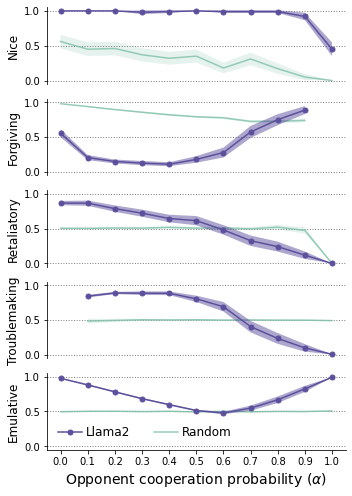

In [59]:
profile_dimensions = ['nice', 'forgiving', 'retaliatory', 'troublemaking', 'emulative'] 
fig, axs = plt.subplots(5,1,figsize=(5,7))
for i, (d, ax) in enumerate(zip(profile_dimensions, axs)):
#    ax= axs[0]
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
    ax.plot(df_profile['URND_coop'], df_profile[f'{d}_mean'], '-o', markersize=5, color=c_blue1,
            zorder=4, label='Llama2')
    ax.fill_between(df_profile['URND_coop'], df_profile[f'{d}_ci_lb'], df_profile[f'{d}_ci_ub'], 
                    color=c_blue1, edgecolor="none", alpha=0.5, zorder=3)
    
    ax.plot(df_profile_rnd['URND_coop'], df_profile_rnd[f'{d}_mean'], '-', markersize=5, color=c_green1, 
            zorder=2, alpha=0.8, label='Random')
    ax.fill_between(df_profile_rnd['URND_coop'], df_profile_rnd[f'{d}_ci_lb'], df_profile_rnd[f'{d}_ci_ub'], 
                    color=c_green1, edgecolor="none", alpha=0.2, zorder=1)
    
    ax.set_ylabel(d.capitalize(), fontsize=12)
    ax.set_ylim([-0.05,1.05])
    ax.set_xlim([-0.05,1.05])
    ax.spines[['right', 'top']].set_visible(False)
    if i < 4:
        ax.spines[['bottom']].set_visible(False)
        ax.set_xticks([])

lgnd = plt.legend(fontsize=12, loc="lower left", handletextpad=0.3,
                   ncol=2, frameon=False) #bbox_to_anchor=(0.1, 0.1), 
lgnd.get_frame().set_facecolor('white')
#lgnd.get_frame().set_linewidth(0.0)

ax.set_xticks(df_profile['URND_coop'])
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)

plt.tight_layout()
plt.savefig('profile.pdf')

### SFEM plot

In [68]:
df_sfem = pd.read_csv(f'{data_dir}/sfem-urnd_coop/llama2_sfem-urnd_coop.csv')
# filter out extremes
df_sfem = df_sfem[(df_sfem['URND_coop']>0) & (df_sfem['URND_coop']<1)]
df_sfem.head(11)

,Unnamed: 0,URND_coop,RND_score,ALLC_score,ALLD_score,TFT_score,STFT_score,GRIM_score,WSLS_score
1,1,0.1,5.572783e-14,1.711613e-15,5.318732e-13,7.533868e-16,1.506640e-15,1.000000,1.197154e-15
2,2,0.2,7.505064e-14,2.320886e-16,1.336623e-13,9.447284e-17,1.265511e-16,1.000000,8.233026e-17
3,3,0.3,1.026369e-13,1.000000e-02,1.000000e-02,9.644507e-03,3.383823e-16,0.963661,6.694012e-03
4,4,0.4,1.000000e-02,4.237422e-13,1.000000e-02,1.100816e-02,1.434021e-16,0.960000,8.991838e-03
5,5,0.5,4.166894e-02,7.661137e-02,5.467903e-13,1.774929e-02,9.410744e-14,0.850000,1.397040e-02
6,6,0.6,5.108317e-03,2.200000e-01,4.528175e-13,6.038269e-03,1.666906e-16,0.764892,3.961731e-03
7,7,0.7,1.000000e-02,6.100000e-01,1.179062e-10,1.553482e-16,4.043110e-16,0.380000,8.584421e-16
8,8,0.8,7.137754e-14,7.700000e-01,1.422816e-13,5.402505e-17,5.800484e-17,0.230000,9.775652e-17
9,9,0.9,1.650684e-13,9.032921e-01,1.161043e-13,3.815586e-03,7.212306e-15,0.090000,2.892341e-03


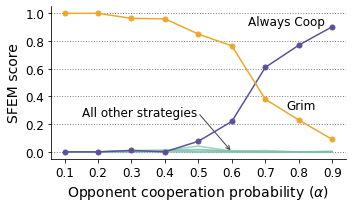

In [196]:
strategies = ['RND', 'ALLD', 'TFT', 'STFT', 'WSLS', 'ALLC', 'GRIM']
colorlist = [c_green1, c_green1, c_green1, c_green1, c_green1, c_blue1, c_orange1]
fig, ax = plt.subplots(1,1,figsize=(5,3))
for i, (strategy, c) in enumerate(zip(strategies,colorlist)):
    linestyle = '-'
    alpha=0.7
    if strategy in ['GRIM', 'ALLC']:
        linestyle = '-o'
        alpha=1
    ax.plot(df_sfem['URND_coop'], df_sfem[f'{strategy}_score'], linestyle, markersize=5,
            c=c, zorder=i+1, alpha=alpha, label='Llama2')

ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xticks(df_sfem['URND_coop'])
ax.set_ylabel('SFEM score', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)

ax.text(0.85, 0.35, 'Grim', fontsize=12,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.80, 0.90, 'Always Coop', fontsize=12,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.3, 0.3, 'All other strategies', fontsize=12,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.annotate("", xy=(0.6, 0), xytext=(0.5, 0.28),
            arrowprops=dict(arrowstyle="->", color=c_gray1))
plt.tight_layout()
plt.savefig('sfem.pdf')

### Coop vs alpha plot

In [138]:
df_coop = pd.read_csv(f'{data_dir}/steady_state_coop-urnd_coop/llama2_steady_state_coop-urnd_coop.csv')
df_coop.head(3)

,Unnamed: 0,URND_coop,Llama2_coop,ci_lb,ci_ub
0,0,0.0,0.021444,0.016914,0.025975
1,1,0.1,0.027778,0.021064,0.034492
2,2,0.2,0.031444,0.022051,0.040838


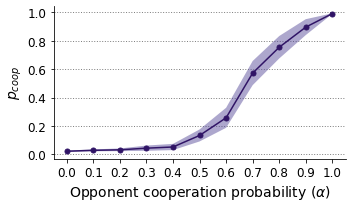

In [146]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

ax.plot(df_coop['URND_coop'], df_coop[f'Llama2_coop'], linestyle, markersize=5,
            c=c, zorder=i+1, alpha=alpha)
ax.fill_between(df_coop['URND_coop'], df_coop[f'ci_lb'], df_coop[f'ci_ub'], 
                color=c_blue1, edgecolor="none", alpha=0.5, zorder=3)

ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xticks(df_coop['URND_coop'])
ax.set_ylabel('$p_{coop}$', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)

plt.tight_layout()
plt.savefig('coop_vs_alpha.pdf')

### Window size plots

In [3]:
# df_win = pd.read_csv(f'{data_dir}/llama2_coop_vs_opponent/llama2_vs_ALLD_wdw-no_wdw.csv')
df_win = pd.read_csv(f'../../csv_files_for_plots/gpt35t_coop_vs_opponent/gpt35t_vs_ALLD_wdw-no_wdw.csv')
df_win.head(3)

,Unnamed: 0,iteration,no_wdw_mean,no_wdw_ci_lb,no_wdw_ci_ub,wdw_mean,wdw_ci_lb,wdw_ci_ub
0,0,1,0.933333,0.838597,1.028070,0.966667,0.898492,1.034841
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,3,0.666667,0.487632,0.845701,0.533333,0.343861,0.722806


In [5]:
# df_winsize = pd.read_csv(f'{data_dir}/coop_bias-window_size/llama2_coop_bias-window_size.csv')
df_winsize = pd.read_csv(f'../../csv_files_for_plots/coop_bias-window_size/llama2_coop_bias-window_size.csv')
df_winsize.head(3)

,Unnamed: 0,window_size,mean,ci_lb,ci_ub
0,0,1,0.527556,0.517270,0.537841
1,1,2,0.408667,0.400335,0.416998
2,2,3,0.340667,0.325558,0.355775


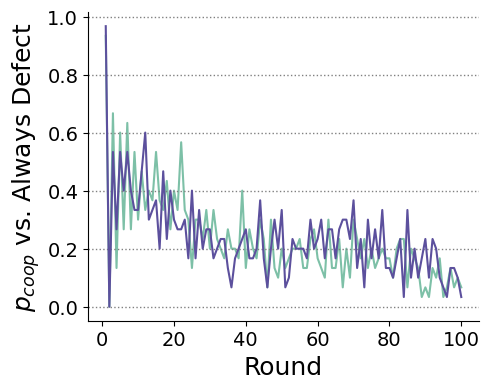

In [13]:
# fig, axs = plt.subplots(1,2,figsize=(7,4))
fig, ax = plt.subplots(1,1,figsize=(5,4))
alpha=1.0

# ax = axs[0]

ax.plot(df_win['iteration'], df_win[f'wdw_mean'], '-', markersize=5,
            c=c_blue1, zorder=2, alpha=alpha)
# ax.fill_between(df_win['iteration'], df_win[f'wdw_ci_lb'], df_win[f'wdw_ci_ub'], 
#                 color=c_blue1, edgecolor="none", alpha=0.5, zorder=0)

ax.plot(df_win['iteration'], df_win[f'no_wdw_mean'], '-', markersize=5,
            c=c_green1, zorder=1, alpha=alpha)
# ax.fill_between(df_win['iteration'], df_win[f'no_wdw_ci_lb'], df_win[f'no_wdw_ci_ub'], 
#                 color=c_green1, edgecolor="none", alpha=0.5, zorder=0)

ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#ax.set_xticks(df_win['iteration'])
ax.set_ylabel('$p_{coop}$ vs. Always Defect', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Round', fontsize=18)

# ax.text(0.7, 1, 'Full history', fontsize=14,
#         horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
# ax.text(0.7, 0.2, 'Window size 10', fontsize=14,
#         horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
# 
# ax = axs[1]
# ax.plot(df_winsize['window_size'], df_winsize[f'mean'], '-', markersize=5,
#             c=c_orange1, zorder=2, alpha=alpha)
# ax.fill_between(df_winsize['window_size'], df_winsize[f'ci_lb'], df_winsize[f'ci_ub'], 
#                 color=c_orange1, edgecolor="none", alpha=0.3, zorder=0)
# ax.spines[['right', 'top']].set_visible(False)
# ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
# ax.set_xlim([0,40])
# ax.tick_params(axis='both', labelsize=14)
# ax.set_xlabel('Window size', fontsize=18)
# ax.set_yticks([0,0.2,0.4,0.6])

plt.tight_layout()
plt.savefig('windowsize.pdf')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

c_orange1= '#ECA72C'

ax.plot(df_win['iteration'], df_win[f'wdw_mean'], '-', markersize=5,
            c=c_blue1, zorder=2, alpha=alpha)
ax.fill_between(df_win['iteration'], df_win[f'wdw_ci_lb'], df_win[f'wdw_ci_ub'], 
                color=c_blue1, edgecolor="none", alpha=0.5, zorder=0)

ax.plot(df_win['iteration'], df_win[f'no_wdw_mean'], '-', markersize=5,
            c=c_orange1, zorder=1, alpha=alpha)
ax.fill_between(df_win['iteration'], df_win[f'no_wdw_ci_lb'], df_win[f'no_wdw_ci_ub'], 
                color=c_orange1, edgecolor="none", alpha=0.5, zorder=0)

ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#ax.set_xticks(df_win['iteration'])
ax.set_ylabel('$p_{coop}$ vs. Always Defect', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Round', fontsize=14)

ax.text(0.7, 1, 'Full history', fontsize=12,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.7, 0.2, 'Window size 10', fontsize=12,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

plt.tight_layout()
plt.savefig('windowsize.pdf')